<center>

# Homework Assignment 10:  Natural Language Processing

## 11th November 2024

#### Syed Asghar Abbas Zaidi 07201 in CS/CE 457/464-L1

#### sz07201@st.habib.edu.pk

</center>


In [2]:
 # from nltk.tokenize import word_tokenize
 # from nltk.tag import pos_tag
 import nltk
 nltk.download('averaged_perceptron_tagger')
 nltk.download('punkt')
 from nltk import pos_tag, word_tokenize, RegexpParser
 import spacy
 from spacy import displacy
 from collections import Counter
 import en_core_web_sm
 from bs4 import BeautifulSoup
 import requests
 import re
 import numpy
 import os
 import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 1. NER Analysis
## Code and some analysis

In [4]:
nlp = spacy.load('en_core_web_sm')

Using the below function, we will get the url of the article.

In [5]:
 def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))


Applying NER to the article "Explaining the Metaverse of Persona 5 with Jungian Psychology" by Michelle Kwan

In [7]:
url = 'https://medium.com/@mchllshell/explaining-the-metaverse-of-persona-5-with-jungian-psychology-26e20e39b48e'
STR = url_to_string(url)
persona_article = nlp(STR)
print(f"Total number of named entities: {len(persona_article.ents)}")

Total number of named entities: 43


The Frequency by which these entity labels appear in the article

In [8]:
 article_labels = [x.label_ for x in persona_article.ents]
 label_count = Counter(article_labels)
 print("\nEntity labels and their counts:")
 print(label_count)


Entity labels and their counts:
Counter({'PERSON': 15, 'NORP': 7, 'CARDINAL': 5, 'ORG': 5, 'GPE': 3, 'WORK_OF_ART': 2, 'DATE': 2, 'PRODUCT': 2, 'ORDINAL': 2})


In this context, entities are specific pieces of information like names of people, organizations, places, dates, and other distinct items. For instance, "PERSON" appears 15 times, indicating that names of people were identified 15 times in the text. "NORP" stands for nationalities or religious or political groups and appears 7 times. "CARDINAL" numbers, which are numerals that don't fit into another category, show up 5 times. Similarly, "ORG" represents organizations and appears 5 times. "GPE" indicates geopolitical entities such as countries, cities, or states, and appears 3 times. "WORK_OF_ART" includes titles of books, songs, or artworks and is found 2 times. "DATE" represents specific dates or periods, also showing up 2 times. "PRODUCT" refers to named products like vehicles or foods, appearing twice as well. Lastly, "ORDINAL" numbers, which are order numbers like first or second, appear twice. This breakdown helps me understand the composition of the text in terms of the entities it mentions.


### Entities which were commonly named!

In [13]:
entity = [x.text for x in persona_article.ents]
most_common_entities = Counter(entity).most_common(5)
print("Most common named entities:")
print(most_common_entities)

Most common named entities:
[('Persona', 8), ('Jungian', 7), ('5', 3), ('Mementos', 3), ('Shadow', 2)]


### Interpretation
The most common named entities in the text are Persona, Jungian, 5, Mementos, and Shadow, appearing 8, 7, 3, 3, and 2 times respectively. \
This indicates that the article heavily focuses on the concepts of Persona and Jungian psychology, particularly in relation to the game Persona 5. The frequent mention of Mementos and Shadow highlights significant themes within the game, such as the depiction of the subconscious mind and the representation of repressed aspects of the self

### Now doing analysis "Sentence" wise, by doing Visualization

In [50]:
article_sentences = [x for x in persona_article.sents]
singular_article_sentence = article_sentences[21]  # select the 21
print("This is the following sentence which was selected for our analysis:")
print(singular_article_sentence)

This is the following sentence which was selected for our analysis:
Whereas in previous games we addressed the antagonists one by one, Mementos gives us a chance to address the struggles of humanity as a whole, and how having an impact on each individual can bring about a positive influence on society.


In [51]:
print("Visualizing named entities found within the sentence:")
displacy.render(nlp(str(singular_article_sentence)), jupyter=True, style='ent')

Visualizing named entities found within the sentence:


In [52]:
entities_in_selected_sentence = dict([(str(x), x.label_) for x in nlp(str(singular_article_sentence)).ents])
print("Entities in the sentence with their labels:")
print(entities_in_selected_sentence)

Entities in the sentence with their labels:
{'one': 'CARDINAL', 'Mementos': 'PERSON'}


In the given sentence, the natural language processing tool has identified two named entities with their respective labels. The term "one" is labeled as "CARDINAL," indicating it is recognized as a numerical term. The name "Mementos" is labeled as "PERSON," which means it has been mistakenly identified as a person's name, though it actually refers to a specific location within the context of the Persona game series. \
This highlights the process of Named Entity Recognition (NER), where the tool attempts to categorize words and phrases into predefined entity types such as people, places, and numbers. The misidentification of "Mementos" underscores the challenges and limitations of NER in accurately interpreting context-specific terms.

## Overall Comments on the results we got
Using the general-purpose spaCy en_core_web_sm model for Named Entity Recognition (NER) provided some interesting insights. The model was able to identify a variety of entities, including people, organizations, and numerical terms, which demonstrates its general effectiveness in recognizing and categorizing different types of entities. However, there were also instances of misclassification, such as labeling "Mementos" as a person when it is actually a location within the context of the Persona game series. This highlights one of the limitations of a general-purpose model: it may struggle with context-specific or domain-specific language, which doesn't fit typical usage patterns. Therefore, for more accurate results in specialized fields, it might be necessary to use a domain-specific model or further customize the existing model.

Overall, my experience with the spaCy en_core_web_sm model has been positive, but it reinforces the need for continuous improvement and adaptation to better handle the variety and nuances of language across different contexts. This helps me understand the strengths and areas for improvement when using NER models for different types of text analysis.

# 2.  Research Paper Analysis

In [53]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32624 sha256=52c637243c0cb12187e35b30a4298f55d0e7e602f332b1e22b4126083b621a1f
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [54]:
!pip install rake_nltk

In [55]:
!pip install textacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.6 MB/s eta 0:00:00


In [56]:
 !pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.8 MB/s eta 0:00:00


In [81]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [57]:
 from tika import parser
 from rake_nltk import Rake
 import textacy
 import yake
 nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [59]:
import urllib.request

 The paper that I have chosen for this task number 2 is named "Navigating the landscape of multiplayer games" by Shayegan Omidshafiei et al which can be accessed at https://www.nature.com/articles/s41467-020-19244-4

In [70]:
url_lib = "https://www.nature.com/articles/s41467-020-19244-4"
urllib.request.urlretrieve(url_lib, "research_paper.pdf")
Raw = parser.from_file('/content/research_paper.pdf')

In [71]:
Words_Tokenized = nltk.tokenize.word_tokenize(Raw['content'])

### Now proceeding to do "Cleaning", "Text preprocessing" and "Data Cleaning" so that I can attain some Generic Visualizations!

The preprocess_text function is designed to clean and normalize the input text. It removes extra spaces, punctuation, and converts the text to lowercase, ensuring consistency and simplicity for further text analysis. This step is crucial in preparing raw text data for more detailed processing and analysis.

In [72]:
 def preprocess_text(text):
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return text

The code filters out common stopwords and additional specific terms from the text. It then removes any non-alphabetic characters, leaving only meaningful words. This results in a clean list of significant words for further analysis.

In [73]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in Words_Tokenized if word.lower() not in stopwords]
# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

This code counts how often each word appears in the cleaned list of words. It then finds the 20 most common words and shows them.

In [78]:
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(40)

[('games', 290),
 ('game', 196),
 ('graph', 90),
 ('response', 80),
 ('Google', 71),
 ('Scholar', 70),
 ('strategies', 68),
 ('Fig', 66),
 ('analysis', 60),
 ('agents', 57),
 ('strategy', 54),
 ('Article', 50),
 ('empirical', 48),
 ('structure', 45),
 ('also', 41),
 ('e.g.', 40),
 ('AI', 39),
 ('complexity', 39),
 ('transitive', 39),
 ('Proc', 39),
 ('used', 37),
 ('payoffs', 37),
 ('underlying', 37),
 ('landscape', 34),
 ('learning', 34),
 ('generation', 34),
 ('payoff', 34),
 ('J', 34),
 ('number', 33),
 ('k', 32),
 ('policies', 31),
 ('Nature', 30),
 ('measures', 30),
 ('graphs', 30),
 ('associated', 30),
 ('α-Rank', 30),
 ('\\bf', 30),
 ('using', 28),
 ('use', 28),
 ('results', 28)]

### Interpretation
The data highlights the frequency of specific terms within the text, revealing key themes and subjects. The words "games" and "game" are most prevalent, indicating a strong focus on gaming-related content. Terms like "graph," "response," and "analysis" suggest a significant emphasis on data representation and examination. The mentions of "Google" and "Scholar" point to academic resources and research contexts. The frequency of "strategies," "agents," and "strategy" reflects a focus on methodologies and tactical approaches. Other terms such as "AI," "complexity," and "learning" indicate discussions around artificial intelligence and its intricacies. Overall, this analysis provides a clear picture of the primary topics and areas of interest in the text, emphasizing gaming, data analysis, and academic research.


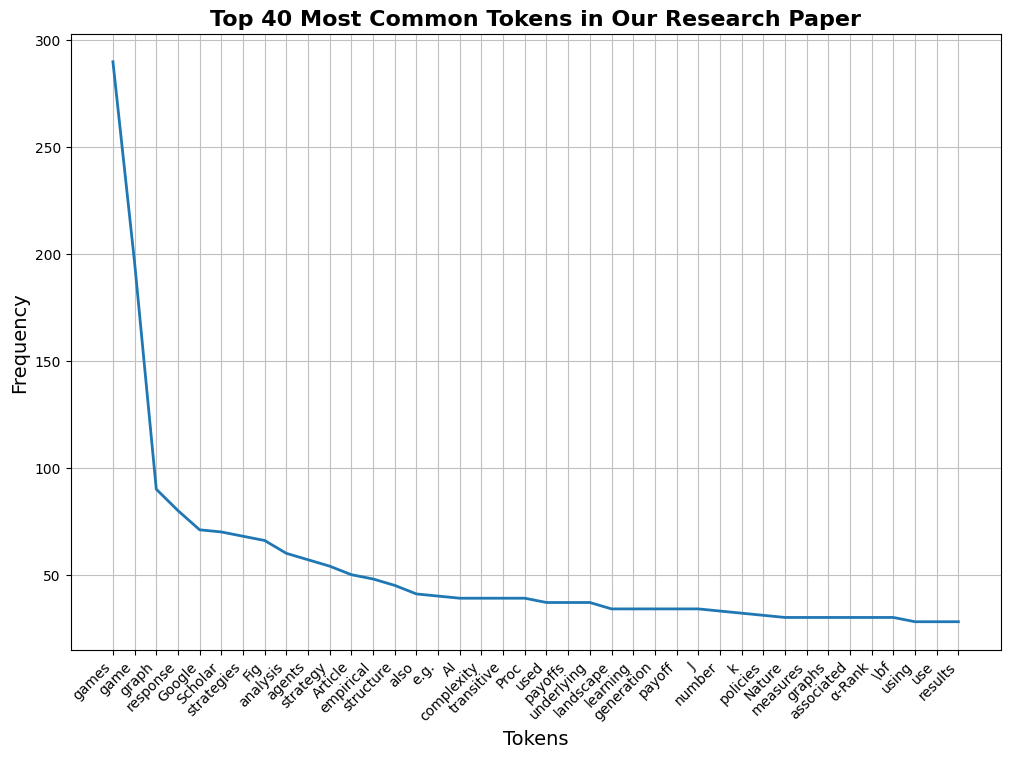

In [82]:
# Customize the plot
plt.figure(figsize=(12, 8))  # Set the figure size
filtered_word_freq.plot(40, cumulative=False, title='Frequency Distribution for 40 Most Common Tokens in Our Paper')

# Customize the title and labels
plt.title('Top 40 Most Common Tokens in Our Research Paper', fontsize=16, fontweight='bold')
plt.xlabel('Tokens', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


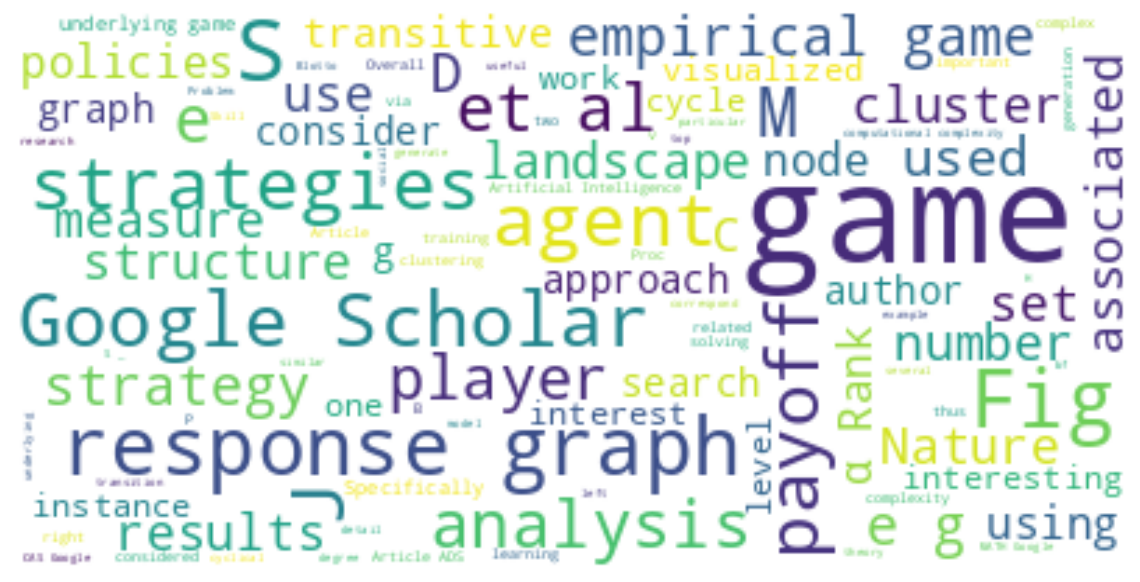

In [97]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120 # Increase DPI for sharper image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


As could be observed, there are alot of words that don't give that much meaningful information, so we will be removing and try cleaning it

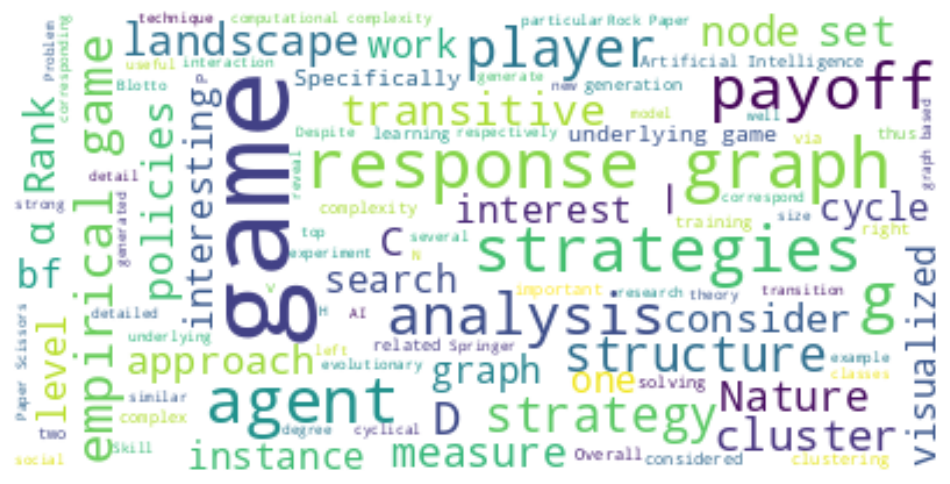

In [104]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update([
    "also", "e.g.", "used", "using", "use", "proc", "fig", "article", "j", "number", "k",
    "results", "associated", "Google", "Scholar", "author", "et", "al", "e", "S", "M", "L", "B", "W"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(Raw['content'])

# Display the word cloud
plt.figure(figsize=(12, 8), dpi=100)  # Set figure size and DPI for sharpness
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Remove axes
plt.show()


The presence of many singular letters in the stopwords list often results from common abbreviations, initials, or references in academic and technical texts. These letters may not add significant meaning to the analysis, so excluding them helps focus on more substantial content within the text. By removing them, the word cloud can better highlight meaningful terms and insights.

Now, we will use **RAKE** to model the Topic, or for Topic Modeling!

In [112]:
rake = Rake()
rake.extract_keywords_from_text(Raw['content'])
rake_keywords = rake.get_ranked_phrases_with_scores()[:10]
print("Top Keywords using RAKE:")
for score, keyword in rake_keywords:
  print(f"{keyword} ({score})")

Top Keywords using RAKE:
services media kits branded content professional development nature careers nature conferences regional websites nature africa nature china nature india nature italy nature japan nature middle east privacy policy use (525.0171405525307)
z )={( 1 +\ exp (- z ))}^{- 1 }\), \({{\ omega }}=\ mathop {\ sum }\ nolimits_ (187.18831628141973)
article 16k accesses 74 altmetric metrics details subjects applied mathematics complex networks computer science information technology abstract multiplayer games (162.6702464202464)
permissions research data language editing scientific editing nature masterclasses research solutions libraries (96.8388888888889)
la théorie du jeu et les équations intégralesa noyau symétrique (88.73214285714286)
us state privacy rights © 2024 springer nature limited close sign (84.27828282828283)
io nature index publishing policies nature portfolio policies open access author (78.29068100358423)
reshaping strategic payoffs article open access 24 oc

### Interpretation
The top RAKE keywords highlight themes like **"services media kits," "branded content,"** and **"professional development"** (525.02), suggesting a focus on resources and solutions from organizations like Nature. Keywords such as **"Nature Africa," "Nature China," "Nature India,"** and others reflect regional initiatives and global outreach. Mentions of **"privacy policy use"** (525.02) suggest legal and ethical considerations.

Mathematical concepts like **"z )={( 1 + exp(-z))}^{-1}"** (187.19) and **"la théorie du jeu"** (88.73) alongside **"multiplayer games"** (162.67) point to a mix of technical and recreational content rooted in game theory and applied mathematics.

Additional phrases, such as **"permissions research data"** and **"scientific editing"** (96.83), highlight research support, editing services, and library resources, emphasizing academic and professional development. These align with terms like **"Nature Masterclasses"** and **"research solutions."**


 **Reasoning on why did we get such a result?** \
 RAKE extracted unrelated terms from metadata, diluting the focus. The article emphasizes multiplayer games, game theory, and network dynamics. Filtering for game-specific keywords would improve relevance. Rake is also usually known for identifying longer, contextually meaningful phrases so bibliographical data proved to be pretty noisy. As I downloaded the paper directly from the website, perhaps this is why I was getting such a data which affected the results to such an extreme extent?

### Now we will be using "Textacy" for Topic Modeling

In [113]:
EN = textacy.load_spacy_lang("en_core_web_sm")
#convert the text into a spacy document.
doc = textacy.make_spacy_doc(Raw['content'], lang=EN)
#Print the keywords using TextRank algorithm, as implemented in Textacy.
print("Textrank output: \n", textacy.extract.keyterms.textrank(doc,
                                                             normalize="lemma",
                                                             topn=5))
# structured information extraction (textacy.extract)
print("Print all keywords output: \n")
keywords = [kps for kps, weights in
                           textacy.extract.keyterms.textrank(doc,
                                                             normalize="lemma")]
print(keywords)

Textrank output: 
 [('procedural game structure generation approach', 0.013089269704654634), ('underlying game response graph', 0.012819857474386222), ('empirical game theoretic analysis', 0.012292094881532139), ('realtime strategy game', 0.01225396637447897), ('procedural game structure generation scheme', 0.01223791689384794)]
Print all keywords output: 

['procedural game structure generation approach', 'underlying game response graph', 'empirical game theoretic analysis', 'realtime strategy game', 'procedural game structure generation scheme', 'empirical game payoff', 'large game generation result', 'individual game complexity measure', 'M. a. Evolutionary game dynamic', 'game analysis approach']


I ran the TextRank algorithm for topic modeling on my dataset and among the top phrases identified, "procedural game structure generation approach" stands out with the highest relevance score of 0.013. This suggests that the text discusses methods for generating game structures, possibly in a procedural or algorithmic way. Following closely are "underlying game response graph" and "empirical game theoretic analysis," with scores of 0.0128 and 0.0123, respectively. These indicate that the text also emphasizes the analysis of game dynamics through graphs and game theory, highlighting a mathematical or strategic approach to understanding game behavior.

Other key phrases like "realtime strategy game" and "procedural game structure generation scheme" further reinforce the focus on strategy games and procedural generation methods. The presence of terms like "empirical game payoff" and "individual game complexity measure" suggests that the text might also explore how different game outcomes or complexities can be quantified or measured.

The full list of keywords also includes terms such as "large game generation result" and "game analysis approach," which point towards a broader exploration of game theory, complexity, and the analysis of large-scale game scenarios.

From these results, it's clear that the text revolves around a technical and theoretical examination of game design, particularly procedural generation, strategy games, and game theory. The presence of terms related to empirical analysis suggests a focus on real-world applications of these concepts, possibly involving data-driven methods for game design or optimization.

### Comparing to RAKE
TextRank outperforms RAKE by providing more contextually relevant keywords, as it captures the semantic relationships between terms rather than just their frequency. This makes it better at extracting meaningful phrases that reflect the broader themes of the text. However, TextRank can be more computationally intensive and might struggle with domain-specific language if the data isn't rich enough. Overall, it is more effective in tasks requiring a deeper understanding of word relationships.

Now we will be using **YAKE**, over Rake and TextRank, and see how it performs in comparision,

In [115]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(Raw['content'])
for kw in keywords:
    print(kw)

('Google Scholar', 0.00016667746553859455)
('MATH Google Scholar', 0.00018542986069413508)
('CAS Google Scholar', 0.00018549352489079647)
('games', 0.0002649113530526496)
('Article Google Scholar', 0.000272577967037216)
('game', 0.0003892828803074147)
('ADS CAS Google', 0.0005098770625954081)
('PubMed Google Scholar', 0.0008199028375049584)
('Fig.', 0.0008836077860197524)
('response graph', 0.0008871640431029377)
('game structure generation', 0.0012894232612282374)
('Article ADS CAS', 0.0014477224788553233)
('Scholar', 0.0015156188667397857)
('Google', 0.0015310549266432146)
('empirical game', 0.0015911595388192114)
('MATH Google', 0.0016887392589868151)
('CAS Google', 0.001691547361672138)
('procedural game structure', 0.0018912735956405312)
('MathSciNet MATH Google', 0.0019560543143112893)
('Google Scholar Togelius', 0.0021409057665334377)


### Interpretation of the above results
The YAKE analysis provides a detailed breakdown of the most significant key phrases within the text. Phrases like "Google Scholar" (0.00016667746553859455) and "MATH Google Scholar" (0.00018542986069413508) appear frequently, indicating a heavy emphasis on academic databases and research tools. The term "games" (0.0002649113530526496) and related phrases like "game structure generation" (0.0012894232612282374) suggest a focus on gaming concepts and methodologies. Phrases such as "response graph" (0.0008871640431029377) and "procedural game structure" (0.0018912735956405312) indicate detailed discussions around data structures and game design. Other terms like "PubMed Google Scholar" (0.0008199028375049584) and "empirical game" (0.0015911595388192114) further highlight the integration of academic resources with empirical studies in gaming. Overall, this data reflects a strong intersection of academic research tools and detailed technical discussions around gaming and data structures within the text.

**YAKE Pros** \
YAKE (Yet Another Keyword Extractor) is a lightweight, unsupervised keyword extraction algorithm that focuses on the statistical properties of keywords within a text. It differs from others by not relying on external corpora or pre-trained models, making it fast and efficient. Unlike TextRank, which uses a graph-based approach, YAKE assesses the relevance of keywords based on their distribution and co-occurrence patterns within the document, ensuring quick and context-specific keyword identification.

### OVERALL ANALYSIS
RAKE, YAKE, and TextRank are popular keyword extraction algorithms, each with its own strengths and weaknesses. **RAKE** is simple and efficient, identifying keywords based on word frequency and co-occurrence patterns. It's fast and easy to implement but may miss nuanced relationships between words. **YAKE** focuses on statistical properties within a document, making it corpus-independent and suitable for multi-lingual text analysis. It's fast and versatile but may not capture deeper contextual relationships. **TextRank** uses a graph-based approach, ranking keywords based on their importance within the text. It's effective for context-aware keyword extraction but can be computationally intensive. Each algorithm has its ideal use case depending on the specific needs of the text analysis task.


# 3. Sentiment Analysis on Tweets
I chose https://x.com/lightningclare ! His recent tweets till Sep 22
I really respect his translation and opinions on one of my favourite series called "Jujutsu Kaisen" aka "JJK". He tweets nuances that the official english translator misses and gives his personal insights as well. Although rarely, his tweets may contain aggressive language.


In [116]:
 import json
 import pandas as pd
 import numpy as np
 from textblob import TextBlob

In [117]:
 twittertext = open('/content/Lightning.txt','r',encoding='utf-8')

In [118]:
 corpus = twittertext.read()
 corpus

"Vol. 30: Inhumane Demonic Shinjuku Showdown -Life & Death-\nVol. 31: From Here On Out\nYuji Itadori went from looking up to looking down on you\nSukuna still sticking out his to tongue and pulling out his 2nd mouth\nThe perfect cover ending and tribute to Vol. 1\n\nThe smartest decision Gege Akutami made in his entire career is to not have a public social media account and I will stand by that\n\n- JJK final volumes 29-30 releasing Dec 25th\n- MHA final volume 42 releasing Dec 4th\n- OnK final volume 16 is out Dec 18th\n\nDamn 2024 is really the end of an era 😭😭\n\nTITE KUBO on his favorite battle in JJK, 𝙈𝙖𝙠𝙞 𝙕𝙚𝙣𝙞𝙣 𝙫𝙨. 𝙊𝙜𝙞 𝙕𝙚𝙣𝙞𝙣, 𝙩𝙝𝙚 𝙆𝙪𝙠𝙪𝙧𝙪 𝙎𝙦𝙪𝙖𝙙, 𝙖𝙣𝙙 𝙩𝙝𝙚 𝙃𝙚𝙞:\n\n“The story follows Akutami's signature flashbacks that alternate between fact and fiction as he does his best to avoid explanations of complex Cursed Techniques, a general feature of Jujutsu battles; it’s followed by a succession of incredible-looking CTs easy to understand at a glance and a series of battles filled with so 

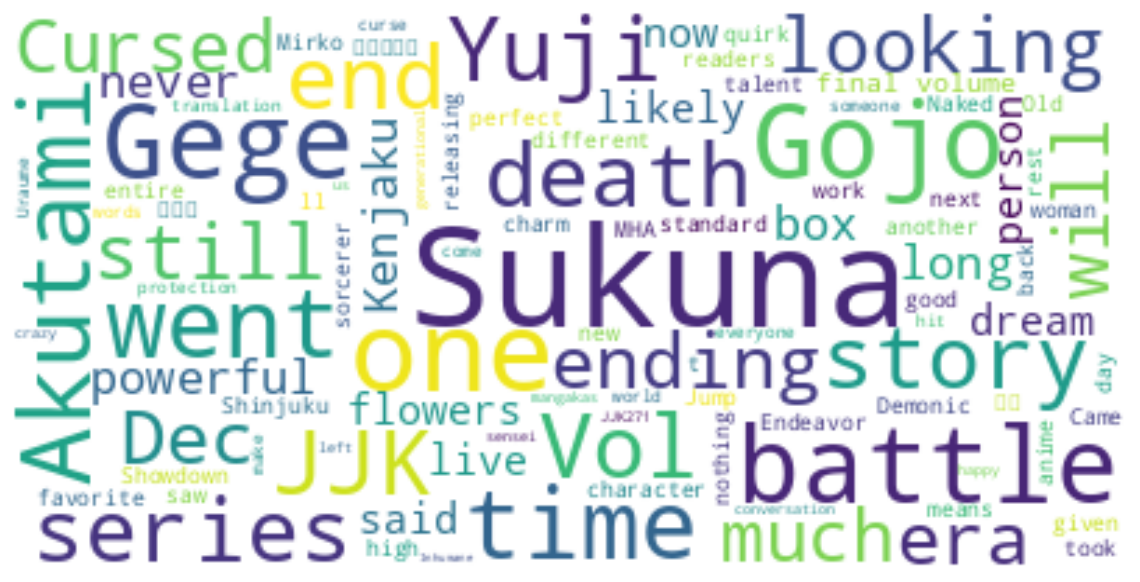

In [120]:
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])
stopwords.update([
    "also", "e.g.", "used", "using", "use", "proc", "fig", "article", "j", "number", "k",
    "results", "associated", "Google", "Scholar", "author", "et", "al", "e", "S", "M", "L", "B", "W"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
with open('/content/Lightning.txt', "r", encoding="utf-8") as file:
    tweets = file.read()
tweets = [tweet.strip() for tweet in tweets.split("\n\n") if tweet.strip()]
print(f"Loaded {len(tweets)} tweets.")

Loaded 52 tweets.


In [149]:
 positive_count = 0
 negative_count = 0
 neutral_count = 0
 positive_tweets = []
 negative_tweets = []
 for tweet in tweets:
    sentiment = TextBlob(tweet).sentiment.polarity
    if sentiment > 0:
        positive_count += 1
        positive_tweets.append(tweet)
    elif sentiment < 0:
        negative_count += 1
        negative_tweets.append(tweet)
print(f"Total Positive Tweets: {positive_count}")
print(f"Total Negative Tweets: {negative_count}")
# Display one positive and one negative tweet
if positive_tweets:
  print("\nExample Positive Tweet:")
  print(positive_tweets[4])
if negative_tweets:
  print("\nExample Negative Tweet:")
  print(negative_tweets[1])

Total Positive Tweets: 28
Total Negative Tweets: 9

Example Positive Tweet:
The transition towards Naoya’s battle is exhilarating and perfect. THIS is what it means to be in the artist’s zone.”

Example Negative Tweet:
Praying one day all these jobless bums get caught & sent to jail to rot for the rest of their miserable lives


The sentiment analysis demonstrates the algorithm's capability to accurately interpret clear emotional signals.

For example, a tweet about "lightning" talking about Kubo's favourite battle in JJK is interpreted as positive due to its enthusiastic tone, the same goes for the tweet where he talks about Naoya's battle being exhilaratng and perfect, while a tweet praying for the downfall for someone is considered negative due to its critical nature and usage of words like "jobless bums" and "miserable lives".

These instances show the tool's effectiveness in recognizing straightforward emotional content. However, that's exactly where its weakness also lies

It struggles with humor or sarcasm or nuanced text. Sarcasm usually is about meaning opposite of what you are saying at the moment so the algorithm understandably struggles wth that. Tweets like "Befitting end to Sukuna's Malevolent story" is a positive tweet appreciating that author gave him a character that goes by the name of Sukuna befitting ending, but algorithm takes it literally, and considered it a negative tweet probably due to the usage of "malevolent story". "Among everyone, there was one person whom he has NEVER disrespected nor talked shit about" is also considered negatively even though he is enthusiacally trying to imply how this powerful character never talked badly about someone else inturn giving respect, but algorithm sees the word like "disrespected nor talked shit", and considered it negative probably

It also struggles with tweets that contain both positive and negative sentiments or neutral, forcing them into binaries. A tweet "Vol. 30: Inhumane Demonic Shinjuku Showdown -Life & Death- Vol. 31: From Here On Out Yuji Itadori went from looking up to looking down on you Sukuna still sticking out his to tongue and pulling out his 2nd mouth The perfect cover ending and tribute to Vol. 1" is pretty neutral and is appreciating how things have come full circle with Author drawing similar art for first volume of his manga and final volume making parallels. However, A.I. sees word like "Death" or "Demonic" and considered it a negative tweet when that isn't true.

So it misses the subtleties as well. It is only effective for very straight-forward tweets. For a messy place like Twitter which is known for its' toxicity, it would be pretty good if algorithm gains the ability to differentiate between sarcasm, humour, have a nuanced understanding of the nuances which will improve its accuracy.

# 4. Building Recommendation Engines
Loading the relevant data

In [169]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words = set(stopwords.words('english'))
wn = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [151]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [153]:
df = pd.read_csv("/content/anime-dataset-2023.csv")
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [162]:
df['all_text'] = df['Name'] + " " + df['Genres']

In [163]:
df['all_text'].head()

,all_text
0,"Cowboy Bebop Action, Award Winning, Sci-Fi"
1,"Cowboy Bebop: Tengoku no Tobira Action, Sci-Fi"
2,"Trigun Action, Adventure, Sci-Fi"
3,"Witch Hunter Robin Action, Drama, Mystery, Sup..."
4,"Bouken Ou Beet Adventure, Fantasy, Supernatural"


In [170]:
# Initialize lemmatizer
wn = WordNetLemmatizer()

# Define the stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation and digits
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d", "", text)

    # Tokenize the text and convert it to lowercase
    tokens = word_tokenize(text.lower())

    # Lemmatize words and remove stopwords
    clean_text = [wn.lemmatize(word, pos="v") for word in tokens if word not in stop_words]

    return " ".join(clean_text)

# Assuming you have a DataFrame df with a column 'all_text'
df['clean_text'] = df['all_text'].apply(clean_text)


In [172]:
df['clean_text'].head()

,clean_text
0,cowboy bebop action award win scifi
1,cowboy bebop tengoku tobira action scifi
2,trigun action adventure scifi
3,witch hunter robin action drama mystery supern...
4,bouken ou beet adventure fantasy supernatural


### USING TF-IDF METHOD

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [176]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])
df['clean_text'][0]
print(tfidf_matrix)

  (0, 2731)	0.5825594019503952
  (0, 1240)	0.5825594019503952
  (0, 56)	0.16890694211659574
  (0, 892)	0.35686343897971035
  (0, 18942)	0.3563473329322299
  (0, 15043)	0.19591987018900736
  (1, 2731)	0.493008312091676
  (1, 1240)	0.493008312091676
  (1, 56)	0.14294254998661907
  (1, 15043)	0.16580304803891469
  (1, 17358)	0.4795070889330803
  (1, 17614)	0.48583468046680717
  (2, 56)	0.24777636248982263
  (2, 15043)	0.28740270924684996
  (2, 17972)	0.8859128268877284
  (2, 85)	0.2667677268049425
  (3, 56)	0.16969206587596822
  (3, 18958)	0.4725332925325105
  (3, 6669)	0.4651946575272477
  (3, 14415)	0.5950983689761802
  (3, 3716)	0.20072143715119548
  (3, 11619)	0.279186571286933
  (3, 16795)	0.24317589345601842
  (4, 85)	0.18929560485024355
  (4, 16795)	0.25195680851621505
  :	:
  (24900, 11841)	0.5019334634556052
  (24900, 19019)	0.41820680542091027
  (24900, 11359)	0.6517853830607108
  (24901, 56)	0.17126031463001862
  (24901, 85)	0.1843869381512366
  (24901, 4251)	0.1637336212210949

In [177]:
df.shape

(24905, 26)

In [178]:
def recommend_tfidf(query_index, top_n=3):
    # Retrieve the query TF-IDF vector
    query_tfidf = tfidf_matrix[query_index]

    # Calculate cosine similarities between the query and all other documents
    cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

    # Get indices of the top N most similar items, excluding the query itself
    top_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the query index

    # Create recommendations DataFrame
    recommendations = df.iloc[top_indices].copy()  # Make a copy to avoid SettingWithCopyWarning
    recommendations['similarity_score'] = cosine_similarities[top_indices]

    return recommendations


In [181]:
recommendations_tfidf = recommend_tfidf(query_index=0, top_n=5)
recommendations_tfidf

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,all_text,clean_text,similarity_score
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,"Cowboy Bebop: Tengoku no Tobira Action, Sci-Fi",cowboy bebop tengoku tobira action scifi,0.631041
7586,17205,Cowboy Bebop: Ein no Natsuyasumi,Cowboy Bebop: Ein's Summer Vacation,アインのなつやすみ,6.31,Comedy,A Corgi can certainly dream! Taking a break fr...,Special,1.0,"Dec 21, 2012",...,G - All Ages,7355.0,3932,28,11606.0,27968,https://cdn.myanimelist.net/images/anime/1565/...,Cowboy Bebop: Ein no Natsuyasumi Comedy,cowboy bebop ein natsuyasumi comedy,0.579101
3445,4037,Cowboy Bebop: Yose Atsume Blues,Cowboy Bebop: Session XX - Mish-Mash Blues,カウボーイビバップ よせあつめブルース,7.41,Sci-Fi,Due to the violence portrayed in the Cowboy Be...,Special,1.0,"Jun 26, 1998",...,R - 17+ (violence & profanity),2029.0,2991,96,18116.0,47338,https://cdn.myanimelist.net/images/anime/10/54...,Cowboy Bebop: Yose Atsume Blues Sci-Fi,cowboy bebop yose atsume blue scifi,0.548167
7054,13971,663114,UNKNOWN,663114,5.2,"Award Winning, Fantasy",663114 is a short but hard-hitting monologue o...,Movie,1.0,Sep 2011,...,G - All Ages,11581.0,8721,2,2163.0,3912,https://cdn.myanimelist.net/images/anime/2/689...,"663114 Award Winning, Fantasy",award win fantasy,0.480295
3131,3572,Macross F,Macross Frontier,マクロスF（フロンティア）,7.89,"Action, Award Winning, Romance, Sci-Fi",Following a catastrophic war against a race of...,TV,25.0,"Apr 4, 2008 to Sep 26, 2008",...,PG-13 - Teens 13 or older,753.0,1479,1859,65933.0,143564,https://cdn.myanimelist.net/images/anime/9/156...,"Macross F Action, Award Winning, Romance, Sci-Fi",macross f action award win romance scifi,0.413126


This code is designed to recommend similar items (like anime shows) based on a given query using text analysis and similarity calculations.

First, it takes the text data from the clean_text column of your dataset (which contains descriptions or other text) and converts it into a numerical format using TF-IDF. TF-IDF is a method that helps measure the importance of words in a document compared to all the other documents. It does this by looking at how often a word appears in a specific document and how rare or common it is across all documents.

Once the text is transformed into a matrix of numbers, the code calculates how similar the text of one anime (the query) is to the rest of the items in the dataset using **cosine similarity**. Cosine similarity measures the angle between two vectors (or lists of numbers) to determine how close or similar they are. If the vectors are similar, it means the documents are similar too.

The function recommend_tfidf then finds the most similar items to the given query by sorting the cosine similarity scores and selecting the top ones. It returns a list of the most similar items along with their similarity scores. This allows you to recommend similar anime shows based on the description of a given show, which can be very useful in recommendation systems.

**HOWEVER**, to implement a custom query

In [216]:
def custom_recommendation_tf_idf(query_text, top_n=3):
    # Preprocess the query text
    query_clean = clean_text(query_text)
    query_tfidf = tfidf_vectorizer.transform([query_clean])

    # Filter out rows with "unknown" or null values in clean_text
    valid_indices = df[df['clean_text'].notnull() & (df['clean_text'] != 'unknown')].index

    # Create a filtered TF-IDF matrix based only on valid entries
    valid_tfidf_matrix = tfidf_matrix[valid_indices]

    # Calculate cosine similarities between query and the valid documents
    cosine_similarities = cosine_similarity(query_tfidf, valid_tfidf_matrix).flatten()

    # Get the indices of the top N most similar items, based on valid entries
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]

    # Retrieve the corresponding recommendations from the original DataFrame
    recommendations = df.iloc[valid_indices[top_indices]].copy()
    recommendations['similarity_score'] = cosine_similarities[top_indices]

    return recommendations


In [290]:
custom_rec_tf_idf(custom_query_tfidf, top_n=7)
custom_query_tfidf = "Comedy Supernatural movie "  # The input query

# Call the function to get recommendations based on the query
recommendations_tfidf = custom_rec_tf_idf(custom_query_tfidf, top_n=7)

# Now display only the required columns
recommendations_tfidf_display = recommendations_tfidf[['Name', 'English name', 'Genres', 'Type', 'similarity_score', 'clean_text']]
recommendations_tfidf_display


,Name,English name,Genres,Type,similarity_score,clean_text
797,Yuu☆Yuu☆Hakusho (Movie),Yu Yu Hakusho: The Movie,"Action, Adventure, Comedy, Supernatural",Movie,0.542307,yuuyuuhakusho movie action adventure comedy su...
658,Air Movie,Air: The Motion Picture,"Drama, Romance, Supernatural",Movie,0.485293,air movie drama romance supernatural
13711,Overlord Movie: Manner Movie,UNKNOWN,Comedy,Movie,0.478520,overlord movie manner movie comedy
1563,Clannad Movie,Clannad The Motion Picture,"Drama, Romance, Supernatural",Movie,0.453055,clannad movie drama romance supernatural
21675,Zombieland Saga Movie,UNKNOWN,"Comedy, Supernatural",Movie,0.451809,zombieland saga movie comedy supernatural
280,Aa! Megami-sama! Movie,Ah! My Goddess: The Movie,"Comedy, Romance, Supernatural",Movie,0.443162,aa megamisama movie comedy romance supernatural
5237,Gegege no Kitarou (1985 Movie),Spooky Kitaro,"Adventure, Comedy, Fantasy, Horror, Supernatural",Movie,0.437658,gegege kitarou movie adventure comedy fantasy ...


# Using Word2Vec

In [222]:
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore') # no warnings

In [226]:
# Assuming 'df' is your dataframe with the 'clean_text' column
# Example: df = pd.read_csv("your_file.csv")

# Splitting the description into words
corpus = []
for words in df['clean_text']:
    # Tokenize each clean_text entry into words
    corpus.append(word_tokenize(words.lower()))  # Also converting to lowercase

# Tag each document with its respective ID
documents = [TaggedDocument(doc, [str(df['anime_id'][i])]) for i, doc in enumerate(corpus)]

# Parameters for Doc2Vec model
max_epochs = 5
vec_size = 15
alpha = 0.025

# Initialize and train the Doc2Vec model
dl_model = Doc2Vec(vector_size=vec_size,
                   alpha=alpha,
                   min_alpha=0.00025,
                   min_count=1,
                   dm=1,  # 1 for distributed memory, 0 for dbow (skip-gram)
                   epochs=max_epochs)

# Build vocabulary from the documents
dl_model.build_vocab(documents)

# Train the model for the specified number of epochs
for epoch in range(max_epochs):
    print('Iteration {0}'.format(epoch))
    dl_model.train(documents,
                   total_examples=dl_model.corpus_count,
                   epochs=dl_model.epochs)
    # Decrease the learning rate
    dl_model.alpha -= 0.0002
    # Fix the learning rate after decreasing
    dl_model.min_alpha = dl_model.alpha

# Save the trained model if needed
# dl_model.save("doc2vec_model")

# You can now use the model to infer vector representations for new documents
# Example: dl_model.infer_vector(["example", "document", "text"])

Iteration 0


Iteration 1
Iteration 2
Iteration 3
Iteration 4


In [227]:
 df['clean_text'][0]

'cowboy bebop action award win scifi'

In [228]:
 dl_model[0]

array([ 0.8100344 ,  0.63659674,  2.0553005 , -1.4739685 ,  0.01173842,
        0.15873833,  0.23729643, -0.35847366,  0.2014783 ,  1.392297  ,
        1.1541667 ,  0.7833222 ,  0.34781358,  1.3183842 ,  1.938463  ],
      dtype=float32)

In [282]:
dl_model.wv.most_similar('romance',topn=10)

[('ova', 0.8372906446456909),
 ('wax', 0.8307740688323975),
 ('nekoben', 0.8298892974853516),
 ('alchemic', 0.8257242441177368),
 ('tsutsumimasu', 0.8053252696990967),
 ('kisaragi', 0.8027006983757019),
 ('shitcom', 0.789555013179779),
 ('rokujuusou', 0.7719859480857849),
 ('omotta', 0.7701436877250671),
 ('iketeru', 0.757026195526123)]

Now, we will be testing the model

In [283]:
Q = df['clean_text'][0]
QDT = word_tokenize(Q)
v12 = dl_model.infer_vector(QDT)
records_similar=dl_model.dv.most_similar([v12])

In [284]:
records_similar

[('23579', 0.9340226650238037),
 ('8446', 0.9014742374420166),
 ('1086', 0.8784558176994324),
 ('33196', 0.8709173798561096),
 ('47951', 0.8708124160766602),
 ('40269', 0.8694586753845215),
 ('48007', 0.8645936250686646),
 ('49750', 0.8581170439720154),
 ('46331', 0.8576981425285339),
 ('34817', 0.8574559688568115)]

In [285]:
# Assuming your DataFrame is named df and it contains a column 'anime_id'
# Extracting the first column (anime_ids) and converting to integers
anime_ids = [int(record[0]) for record in records_similar]
anime_ids

[23579, 8446, 1086, 33196, 47951, 40269, 48007, 49750, 46331, 34817]

In [289]:
# Initialize an empty list to store the filtered DataFrames
result_list = []

# Loop through each anime_id and collect the matching rows from df
for i in anime_ids:
    result_list.append(df[df['anime_id'] == i])

# Concatenate the collected DataFrames into one result DataFrame
result = pd.concat(result_list, ignore_index=True)
result = result[['Name', 'English name', 'Genres', 'Type', 'clean_text']]
result.head(5)



,Name,English name,Genres,Type,clean_text
0,12-sai.,Age 12,Romance,OVA,sai romance
1,SAI: Part 1 / Revolving... to the Core,UNKNOWN,Fantasy,Music,sai part revolve core fantasy
2,Kenran Butou Sai: The Mars Daybreak,Mars Daybreak,"Action, Adventure, Comedy, Romance, Sci-Fi",TV,kenran butou sai mar daybreak action adventure...
3,Shi Wan Ge Leng Xiaohua Di 3rd Season,UNKNOWN,Comedy,ONA,shi wan ge leng xiaohua di rd season comedy
4,Wai Xing Ren Ago 4th Season,UNKNOWN,UNKNOWN,TV,wai xing ren ago th season unknown


In comparing the effectiveness of recommendation systems built using TF-IDF and Word2Vec, distinct advantages and drawbacks of each method become apparent. TF-IDF, which stands for Term Frequency-Inverse Document Frequency, excels at generating recommendations based on the frequency of shared terms in the input query. For instance, in response to a query like "Comedy Supernatural movie" TF-IDF prioritizes results with a high overlap of terms such as "Comedy" and "Supernatural," leading to precise but sometimes limited recommendations. This approach ensures that results closely match the user's immediate textual input, making it highly explainable due to the straightforward weighting of term frequencies. However, there were times when some anime titles were "long", and the algorithm believed that there was somehow less similarity to be found in there cause "more words aside of just supernatural and comedy contained there".

Conversely, Word2Vec leverages vector representations to uncover more nuanced and context-aware relationships between words. This method is particularly effective in identifying recommendations that are semantically similar to the query, even when there is no direct overlap of terms. For example, Word2Vec can understand the contextual similarity between different movies, even if they do not share exact keywords.

Practically speaking, both models offer relevant recommendations, but their differing methodologies become evident in the results. TF-IDF is favored for its precision and clarity, making it suitable for users who prioritize exact matches. In contrast, Word2Vec is better at providing diverse and semantically rich recommendations, appealing to users who seek more varied suggestions. Ultimately, the choice between these methods depends on the specific needs of the recommendation system, the importance of explainability, and the desired breadth of results. Each algorithm has its strengths, making them suitable for different types of recommendation tasks.

# THANK YOU!

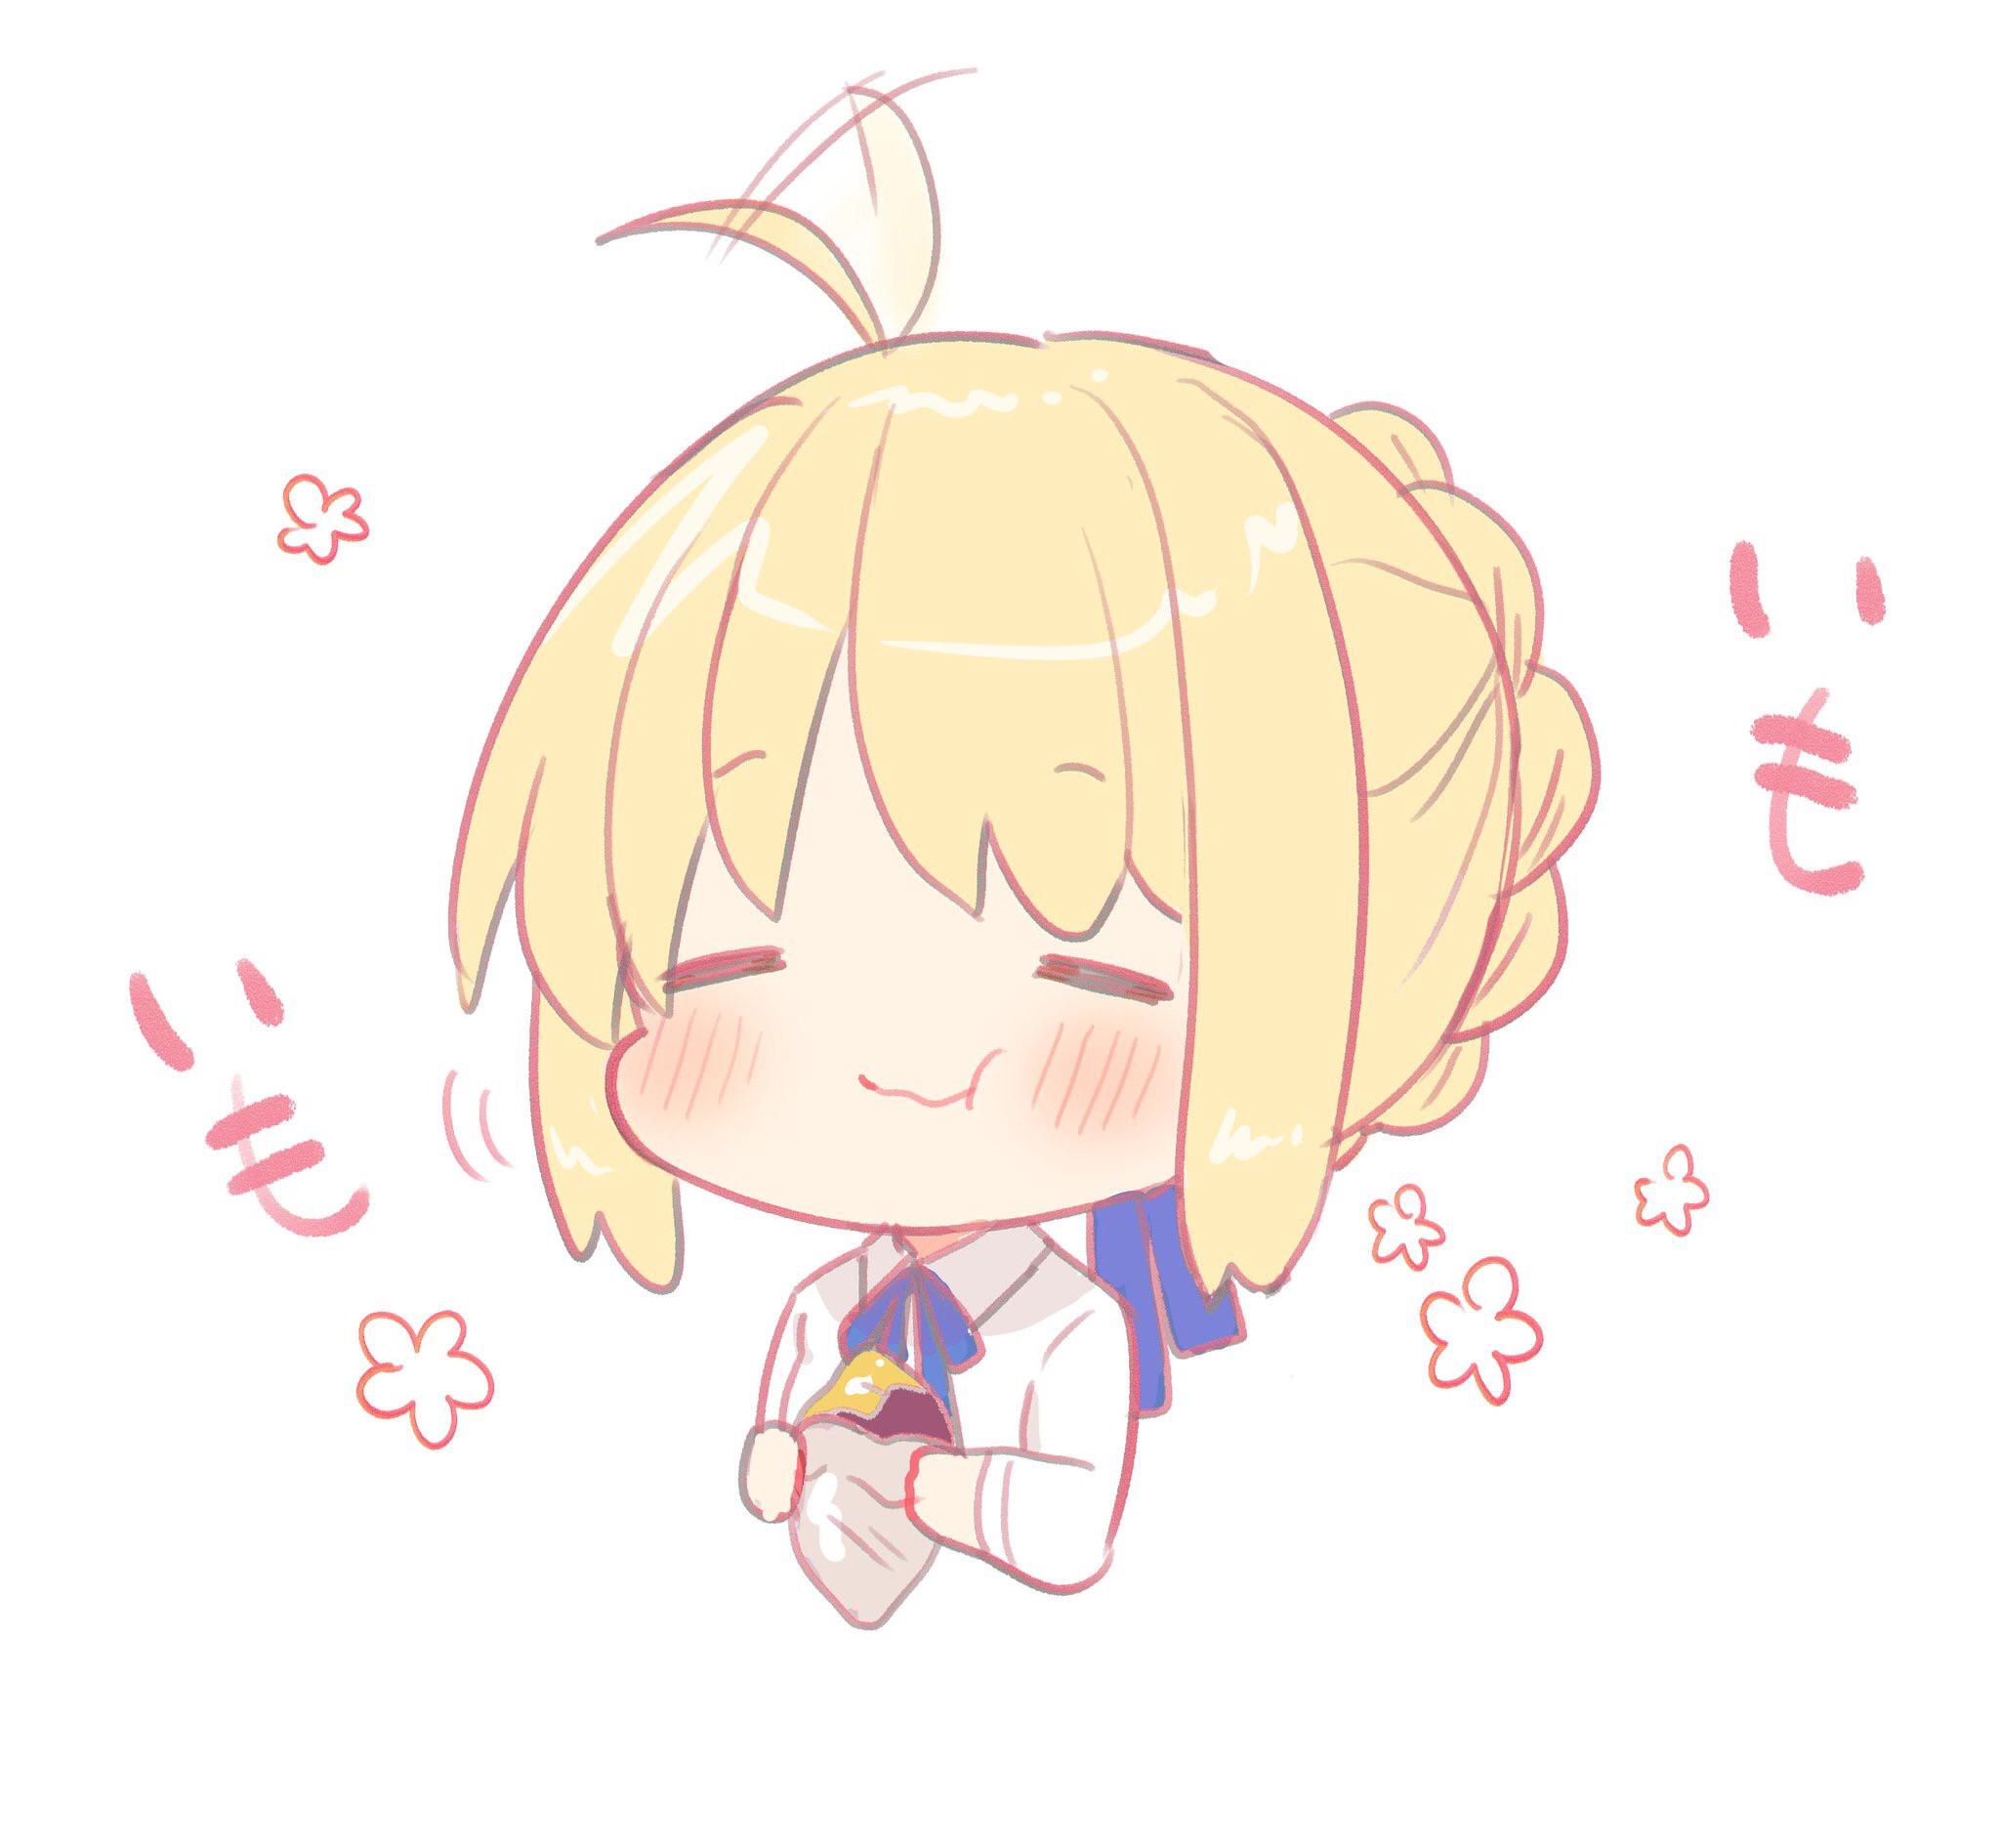

In [291]:
from IPython.display import Image, display

# Load and display image
image_path = 'saberthanks.jpg'
display(Image(filename=image_path,width=300))

Following resources were referred to: \
For an article: https://medium.com/@mchllshell/explaining-the-metaverse-of-persona-5-with-jungian-psychology-26e20e39b48e \
For a research paper: https://www.nature.com/articles/s41467-020-19244-4 \
For an anime dataset: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset